In [2]:
import os
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import tikzplotlib

In [3]:
base_dir = '/share/home/houedry/projects/DifferentiableHyperbolicity/hyperbolicity/expes/results_expes/sensibility_analysis/batch_size'

results_dict = defaultdict(list)

for subfolder in os.listdir(base_dir):
    subfolder_path = os.path.join(base_dir, subfolder)
    
    if os.path.isdir(subfolder_path):
        for file in os.listdir(subfolder_path):
            if file.endswith('.csv'):
                file_path = os.path.join(subfolder_path, file)
                
                df = pd.read_csv(file_path)
                
                df.columns = df.columns.str.strip().str.lower()
                
                if 'scale_delta' not in df.columns or 'mean_optim_distortion' not in df.columns:
                    print(f"Warning: Missing required columns in {file_path}. Skipping this file.")
                    continue
                
                for _, row in df.iterrows():
                    scale_delta = row['batch_size']
                    mean_optim_distortion = row['mean_optim_distortion']
                    
                    if len(results_dict[scale_delta]) < 5:
                        results_dict[scale_delta].append(mean_optim_distortion)

results_dict = dict(results_dict)

for scale_delta, distortions in results_dict.items():
    print(f"batch_size={scale_delta}: {distortions}")

batch_size=8.0: [3.440750684738159, 3.5057676219940186, 3.46274023771286, 3.384714767932892, 3.520770869255066]
batch_size=16.0: [3.052578911781311, 3.15711079120636, 3.0866980075836183, 2.976092083454132, 2.983728141784668]
batch_size=24.0: [2.154102087020874, 2.251445732116699, 2.0529195618629457, 2.0686476588249207, 2.096199266910553]
batch_size=32.0: [1.9457033467292784, 1.874066996574402, 1.9061004281044007, 1.9419041347503665, 1.8893075156211852]
batch_size=36.0: [1.934077980518341, 1.8312211585044864, 1.8866179513931276, 2.1196376347541808, 1.8563044929504395]


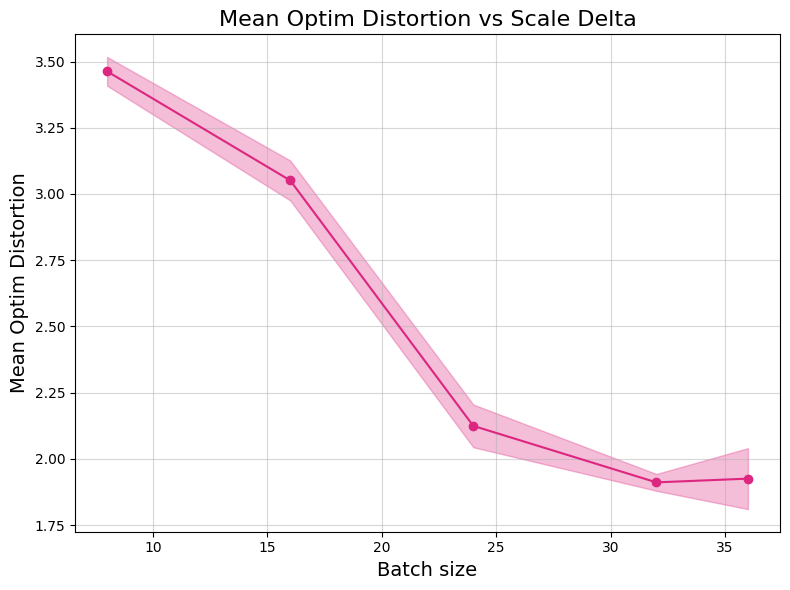

In [9]:
scale_deltas = sorted(results_dict.keys())
means = [sum(distortions) / len(distortions) for distortions in results_dict.values()]
stds = [pd.Series(distortions).std() for distortions in results_dict.values()]

plt.figure(figsize=(8, 6))

# Add labels and title
plt.xlabel('Batch size', fontsize=14)
plt.plot(scale_deltas, means, label='Mean Optim Distortion', color='#DC267F', marker='o')  
plt.fill_between(scale_deltas, 
                 [m - s for m, s in zip(means, stds)], 
                 [m + s for m, s in zip(means, stds)], 
                 color='#DC267F', alpha=0.3, label='±1 Std Dev')  # Green color (color-blind friendly)
plt.ylabel('Mean Optim Distortion', fontsize=14)
plt.title('Mean Optim Distortion vs Scale Delta', fontsize=16)
legend = plt.legend(fontsize=12)
legend.remove()
plt.grid(alpha=0.5)
plt.tight_layout()
tikzplotlib.save("sensibility_analysis_bs_plot.tex")
plt.show()